# Import thư viện

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# -----------------------------
# Đọc dữ liệu
# -----------------------------

In [18]:

DATA_PATH = Path(r"C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\data\final_clean_dataset.csv")  # đổi đường dẫn nếu cần
df = pd.read_csv(DATA_PATH)

# -----------------------------
#  Xử lý thời gian
# -----------------------------

In [19]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date').reset_index(drop=True)

# -----------------------------
#  Xác định Features & Target
# -----------------------------

In [20]:

target = 'gdp_growth_quarterly'
features = [
    'oil_price_close',
    'usd_vnd_close',
    'vnindex_close',
    'fdi_inflow_quarterly',
    'cpi_index_quarterly',
    'retail_value_quarterly',
    'unemployment_value_quarterly'
]

X = df[features].copy()
y = df[target].copy()


# -----------------------------
#  Scale dữ liệu
# -----------------------------

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Chia Train/Test theo thời gian
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)
print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 29, Test: 8


# -----------------------------
# Huấn luyện mô hình
# -----------------------------

In [22]:
# Random Forest
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=8,
    min_samples_split=3
)
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,8
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# -----------------------------
#  Hàm đánh giá
# -----------------------------

In [23]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n📊 Hiệu năng mô hình: {name}")
    print(f"MAE  : {mae:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R²   : {r2:.3f}")
    return y_pred

# Đánh giá
y_pred_rf = evaluate(rf, "Random Forest")


📊 Hiệu năng mô hình: Random Forest
MAE  : 1.228
RMSE : 1.453
R²   : 0.114


# -----------------------------
#  Phân tích độ quan trọng biến (Feature Importance)
# -----------------------------

C:\Users\Admin\AppData\Local\Temp\ipykernel_60180\2458199980.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x='Importance', y='Feature', palette='coolwarm')


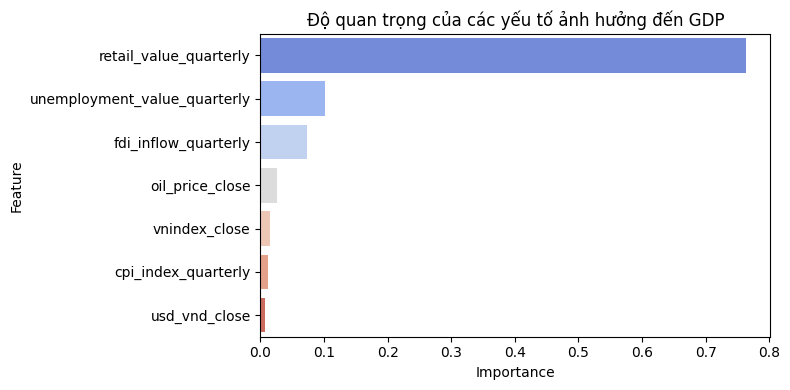

In [25]:


importance = rf.feature_importances_
imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=imp_df, x='Importance', y='Feature', palette='coolwarm')
plt.title("Độ quan trọng của các yếu tố ảnh hưởng đến GDP")
plt.tight_layout()
plt.show()


In [26]:
# -----------------------------
# Lưu model RandomForest
# -----------------------------
import joblib
joblib.dump(rf, "random_forest_gdp_model.pkl")
print("✅ Đã lưu mô hình RandomForest tại random_forest_gdp_model.pkl")

✅ Đã lưu mô hình RandomForest tại random_forest_gdp_model.pkl
